In [1]:
import tensorflow as tf
import importlib
import RNN_Wf; importlib.reload(RNN_Wf) # to be able to modify RNN_Wf.py and use the new version of the file
from RNN_Wf import RNNWaveFunction

import numpy as np
import os, sys
import time

import matplotlib.pyplot as plt
from matplotlib import rcParams
plt.rcParams['xtick.labelsize']  = 18
plt.rcParams['ytick.labelsize']  = 18
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family']      = 'STIXGeneral'
plt.rcParams['axes.labelsize']   = 20
plt.rcParams['font.size']        = 10
plt.rcParams['legend.fontsize']  = 20
plt.rcParams.update({'figure.autolayout': True})

# Definitions

In [7]:
# Model parameters
N_sites = 10
J = tf.ones(shape = (N_sites-1))

# RNN hyperparameters
N_samples = int(1E3)
memory_units = 100
activation_function = tf.keras.activations.elu
n_layers = 3

# Training hyperparameters
n_steps =  1000
lr = 1E-3

# Learning rate schedule
starter_learning_rate = 1E-3
end_learning_rate = 1E-4
decay_steps = n_steps
lr_decay_exponent = 3/4.
learning_rate_fn = tf.keras.optimizers.schedules.PolynomialDecay(
                   starter_learning_rate,
                   decay_steps,
                   end_learning_rate,
                   power = lr_decay_exponent
                   )

# Folder where models are saved
modelsfolder = '/home/s/Dropbox/RNN/Wave_functions/models/'

# Folder where results are saved
resultsfolder = '/home/s/Dropbox/RNN/Wave_functions/results/'

# Flags 
flags={'save_weights' : True,
       'save_history' : True,
       'load_weights' : False,
       'use_schedule' : True,
       }

if (flags['load_weights']):
  N_sites_load = N_sites
else:
  N_sites_load = 0
  
if (flags['use_schedule']):
  if (n_steps > 500):
    lr = learning_rate_fn

# Creating folders if needed
os.makedirs(modelsfolder, exist_ok = True)
os.makedirs(resultsfolder, exist_ok = True)

# Exact energy per site: diagonalization results
ED = {"2" : -0.375, 
      "3" : -0.33333333333,
      "4" : -0.4040075,
      "5" : -0.385578,
      "6" : -0.41559666666,
      "7" : -0.40517714285,
      "8" : -0.42186625,
      "9" : -0.41514666666,
      "10" : -0.425804,
      "40" : -0.438537
     }

# Training

In [ ]:
%%time
import RNN_Wf; importlib.reload(RNN_Wf) # to be able to modify RNN_Wf.py and use the new version of the file
from RNN_Wf import RNNWaveFunction

wf = RNNWaveFunction(n_layers, memory_units, activation_function, N_sites, N_samples, J)
wf.rnn.summary()
if False:
  history = wf.training(n_steps, lr, flags, modelsfolder, N_sites_load)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input_layer (InputLayer)       [(1, 2)]             0           []                               
                                                                                                  
 stacked_rnn_cells (StackedRNNC  ((1, 128),          248832      ['Input_layer[0][0]']            
 ells)                           ((1, 128),                                                       
                                 (1, 128),                                                        
                                 (1, 128)))                                                       
                                                                                                  
 Softmax_layer (Dense)          (1, 2)               258         ['stacked_rnn_cells[0][0]']  

lr:  0.000985651743
iteration 106 | mean e: -0.246637-0.000318j
lr:  0.000985516
iteration 107 | mean e: -0.246792+0.000054j
lr:  0.000985380262
iteration 108 | mean e: -0.247210+0.000413j
lr:  0.000985244522
iteration 109 | mean e: -0.247063-0.000214j
lr:  0.000985108782
iteration 110 | mean e: -0.247197-0.000266j
lr:  0.000984973
iteration 111 | mean e: -0.247269+0.000332j
lr:  0.000984837301
iteration 112 | mean e: -0.247219+0.000074j
lr:  0.000984701444
iteration 113 | mean e: -0.247187-0.000306j
lr:  0.000984565704
iteration 114 | mean e: -0.247026-0.000033j
lr:  0.00098443
iteration 115 | mean e: -0.247214-0.000125j
lr:  0.000984294224
iteration 116 | mean e: -0.247429-0.000218j
lr:  0.000984158367
iteration 117 | mean e: -0.247360-0.000241j
lr:  0.000984022627
iteration 118 | mean e: -0.248204+0.000332j
lr:  0.00098388677
iteration 119 | mean e: -0.247624+0.000181j
lr:  0.000983750913
iteration 120 | mean e: -0.248116-0.000097j
lr:  0.000983615
iteration 121 | mean e: -0.248504-

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input_layer (InputLayer)       [(1, 2)]             0           []                               
                                                                                                  
 stacked_rnn_cells_9 (StackedRN  ((1, 100),          152400      ['Input_layer[0][0]']            
 NCells)                         ((1, 100),                                                       
                                 (1, 100),                                                        
                                 (1, 100)))                                                       
                                                                                                  
 Softmax_layer (Dense)          (1, 2)               202         ['stacked_rnn_cells_9[0][0]

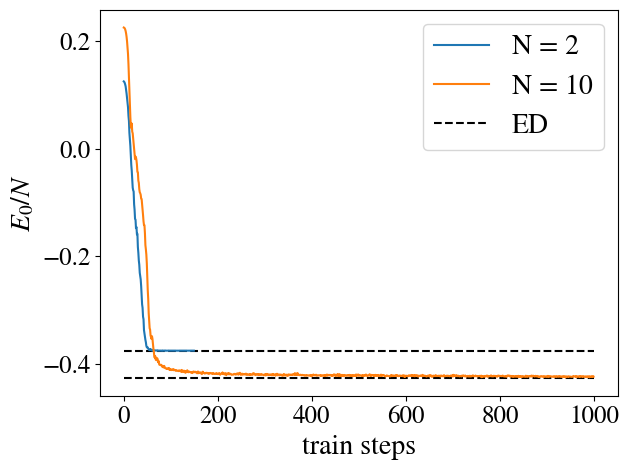

In [15]:
import RNN_Wf; importlib.reload(RNN_Wf) # to be able to modify RNN_Wf.py and use the new version of the file
from RNN_Wf import RNNWaveFunction

wf = RNNWaveFunction(n_layers, memory_units, activation_function, N_sites, N_samples, J)
wf.rnn.summary()

history_list = []

for i, N_sites in enumerate([2,10]):
  history =  np.load(modelsfolder + 'L' + str(N_sites) + '/history.npy')
  plt.plot(tf.math.real(history), label = 'N = ' + str(N_sites)) 
  #plt.plot(tf.math.imag(history), color = 'black')
  if (i==0):
    plt.hlines(ED[str(N_sites)], 0, n_steps, color = 'black', linestyle = 'dashed', label = 'ED')
  else:
    plt.hlines(ED[str(N_sites)], 0, n_steps, color = 'black', linestyle = 'dashed')

plt.ylabel(r'$E_0/N$')
plt.xlabel('train steps')
plt.legend(loc="upper right")
plt.show()

# End of code

# Measurements

In [29]:
%%time
import RNN_Wf; importlib.reload(RNN_Wf) # to be able to modify RNN_Wf.py and use the new version of the file
from RNN_Wf import RNNWaveFunction

N_samples = int(1E3)
wf = RNNWaveFunction(n_layers, memory_units, activation_function, N_sites, N_samples, J)
wf.load_weights(modelsfolder, N_sites)

CPU times: user 190 ms, sys: 0 ns, total: 190 ms
Wall time: 180 ms


In [30]:
%%time
measurements = wf.measure_e_m()

CPU times: user 4.69 s, sys: 0 ns, total: 4.69 s
Wall time: 4.64 s


In [ ]:
plt.plot(tf.math.real(energies), label = 'N = ' + str(N_sites)) 
plt.plot(tf.math.imag(energies), color = 'black')
plt.hlines(ED[str(wf.N_sites)], 0, n_steps, color = 'black', linestyle = 'dashed')
plt.ylabel(r'$e_0$')
plt.xlabel('train steps')
plt.show()

In [ ]:
%%time
import RNN_Wf; importlib.reload(RNN_Wf) # to be able to modify RNN_Wf.py and use the new version of the file
from RNN_Wf import RNNWaveFunction

wf = RNNWaveFunction(memory_units, activation_function, N_sites, N_samples, J)

for i in range(-2,3):
    print(wf.heaviside(i).numpy())

In [76]:
wf.heaviside(2 - N_sites /2)

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

In [77]:
wf.heaviside(N_sites / 2 - 2 )

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>